In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
path = Path('Starter_Code/myopia.csv')
df = pd.read_csv(path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df2 = df.drop(['MYOPIC'], axis = 'columns')
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
df2.dropna()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
df2.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [6]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
df2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [9]:
scaled_data = scaler.fit_transform(df2)

Part 2

In [12]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.sum()

0.9187361702915188

In [13]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

df2['x'] = transformed_features[:,0]
df2['y'] = transformed_features[:,1]
df2['class'] = df['MYOPIC']

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Create a scatter plot of the t-SNE output

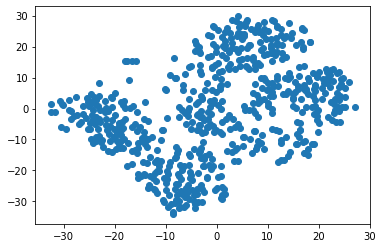

In [14]:
plt.scatter(df2["x"], df2["y"])
plt.show()

Yes, there are existences of distinct cluster based on plot graph above but they are not completely distinct.

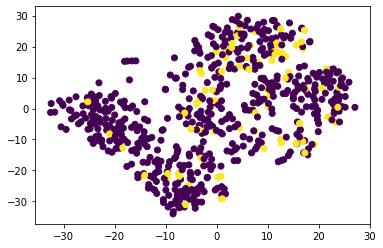

In [15]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

Part 3

In [16]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,502080.657134
1,2,348985.038679
2,3,232618.981368
3,4,199025.313672
4,5,173271.514951


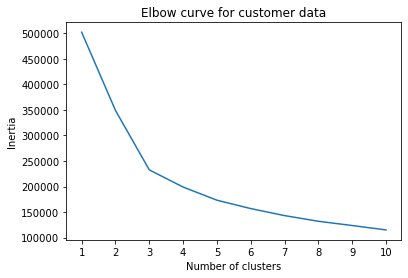

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [18]:
# Function to find the best K 
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [47]:
clusters = get_clusters(4, df2)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,23.368551,-4.498613,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,1.712361,20.635489,3
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-16.681494,-6.105121,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,0.853535,-21.927393,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,7.488822,7.818214,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,16.240828,-4.809793,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,1.336699,20.149855,3
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-0.085304,19.950775,3
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-21.808670,2.334904,0


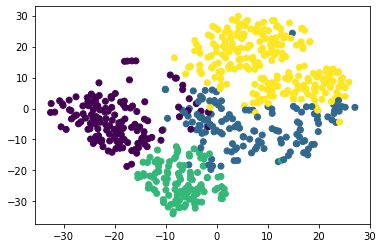

In [48]:
def show_clusters(df):
    plt.scatter(clusters["x"], clusters["y"], c=clusters['class'])
    plt.show()


show_clusters(clusters)

Part 4

After running K values, I recommend the best K value that can have the most distinct clusters is 4.
Even though, in the middle and the navy scatters look like mixed with others but this K value can distinct the most other such as violet and green. 